## clustering start

In [2]:
#Importing packages we want
import pandas as pd
import numpy as np
import collections
import re
from textblob import TextBlob

In [3]:
#def functions --ada
def no_hashtag(content):
    number = [0]*len(content)
    for i in range(len(content)):
        pattern = re.compile(r'#\w+')
        number[i] = len(pattern.findall(content[i]))
    return number

def no_at(content):
    number = [0]*len(content)
    for i in range(len(content)):
        pattern = re.compile(r'@\w+')
        number[i] = len(pattern.findall(content[i]))
    return number
    
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_hashtags(content):
    for i in range(len(content)):
        text = re.sub(r'#\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_at(content):
    for i in range(len(content)):
        text = re.sub(r'@\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_stop_words(content):
    for i in range(len(content)):
        pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
        content[i] = pattern.sub('', content[i].lower())
    return content

def remove_punctuations(content):
    for i in range(len(content)):
        pattern = re.compile(r'[^\w\s]')
        content[i] = pattern.sub('',content[i])
    return content


def sentiment_score(s:str):
    score = TextBlob(s).sentiment[0]
    return score
def contain_topic(topic:str,s:str):
    topic_pattern = re.compile(topic)
    matching = topic_pattern.search(s.lower())
    return (matching != None)
    

In [ ]:
##scratch

In [37]:
## labelled twitter dataset for political topic classfication

In [3]:
##political_df1 = pd.read_csv('general-tweets.txt',sep = '\t',names =['Political','comment'])

In [4]:
##political_df2 = pd.read_csv('keyword-tweets.txt',sep = '\t', names = ['Political','comment'])

In [6]:
##political_df = political_df1.append(political_df2)

In [16]:
##political_df['comment'] = remove_url(list(political_df['comment']))

In [17]:
##political_df['comment'] = remove_hashtags(list(political_df['comment']))

In [18]:
##political_df['comment'] = remove_at(list(political_df['comment']))

In [21]:
##political_df['comment'] = remove_punctuations(list(political_df['comment']))

In [24]:
##political_df['comment'] = political_df['comment'].apply(lambda s: s.lower())

In [ ]:
##scratch

In [4]:
#Reading data
df = pd.read_csv('twitter.csv')

C:\Users\cheny\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,11,16,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_copy = df.copy()

In [46]:
# Dropping some columns which may not be significant for our further analysis
df.drop(columns = ['Unnamed: 0', 'article_url'], axis = 1, inplace = True)

In [47]:
df['account_category'].value_counts()

NonEnglish      820803
RightTroll      711668
NewsFeed        598226
LeftTroll       427141
HashtagGamer    241786
Commercial      121904
Unknown          13539
Fearmonger       11140
Name: account_category, dtype: int64

In [48]:
df.isnull().sum()

external_author_id          0
author                      0
content                     1
region                   8818
language                    0
publish_date                0
harvested_date              0
following                   0
followers                   0
updates                     0
post_type             1648625
account_type                0
retweet                     0
account_category            0
new_june_2018               0
alt_external_id             0
tweet_id                    0
tco1_step1             845971
tco2_step1            2235090
tco3_step1            2931207
dtype: int64

In [49]:
# Since there are too many null values in ['tco2_step1', 'tco3_step1'] columns, we can drop them 
df.drop(columns = ['tco2_step1', 'tco3_step1'], axis = 1, inplace = True)

In [50]:
df.shape

(2946207, 18)

In [ ]:
grouped_df = df.groupby(['author','account_category'],as_index=False).agg({'language':lambda x: 1 if (x!='English').sum()/(x =='English').sum()>1 else 0})

In [13]:
df[df['account_category'] != 'NonEnglish'].language.value_counts()

English                2090305
LANGUAGE UNDEFINED        6548
Italian                   4309
Spanish                   2549
French                    2414
Arabic                    2283
Norwegian                 1789
Farsi (Persian)           1612
Romanian                  1534
Dutch                      968
Vietnamese                 951
German                     778
Estonian                   741
Japanese                   653
Albanian                   550
Catalan                    522
Croatian                   509
Uzbek                      506
Icelandic                  462
Finnish                    462
Swedish                    440
Pushto                     435
Lithuanian                 395
Polish                     354
Portuguese                 316
Somali                     272
Slovak                     241
Turkish                    238
Tagalog (Filipino)         236
Malay                      228
Latvian                    200
Kurdish                    199
Greek   

In [16]:
df[df['account_category'] == 'NonEnglish'].language.value_counts()

Russian               610797
German                 86205
Ukrainian              38642
English                26562
Italian                13754
Serbian                 9473
Bulgarian               9156
Uzbek                   8828
Arabic                  5305
Macedonian              5174
French                  2148
LANGUAGE UNDEFINED      1772
Swedish                  574
Spanish                  462
Norwegian                448
Turkish                  207
Dutch                    197
Portuguese               147
Finnish                  117
Japanese                 111
Romanian                  95
Farsi (Persian)           72
Catalan                   67
Pushto                    52
Kurdish                   36
Icelandic                 36
Croatian                  35
Hungarian                 32
Polish                    32
Vietnamese                31
Estonian                  29
Hebrew                    29
Czech                     24
Albanian                  22
Lithuanian    

In [15]:
#df[df['language'] == 'English'].account_category.value_counts()

RightTroll      704953
NewsFeed        596593
LeftTroll       422141
HashtagGamer    236092
Commercial      112580
NonEnglish       26562
Fearmonger       11001
Unknown           6945
Name: account_category, dtype: int64

In [51]:
#remove the tweets whose account_category is commerical, and unknown,and NonEnglish
df = df[(df['account_category'] !='NonEnglish')&(df['account_category'] !='Commercial')&(df['account_category'] !='Unknown')]

In [17]:
#only use the tweets whose language is English
#df = df[df['language'] == 'English']
#df = df[df['region'] == 'United States']

In [52]:
df.shape

(1989961, 18)

In [53]:
#Define Functions extracting date time element
def get_mdy(string):
    return string.split()[0]
def get_hm(string):
    return string.split()[1]

In [54]:
df['pb_mdy_info'] = df.publish_date.apply(get_mdy)
df['pb_hm_info'] = df.publish_date.apply(get_hm)

In [55]:
def get_month(string):
    return int(string.split('/')[0])
def get_date(string):
    return int(string.split('/')[1])
def get_hour(string):
    return int(string.split(':')[0])

In [56]:
df['pb_month'] = df.pb_mdy_info.apply(get_month)
df['pb_date'] = df.pb_mdy_info.apply(get_date)
df['pb_hour'] = df.pb_hm_info.apply(get_hour)

In [57]:
content = list(df['content'])

In [59]:
content[972696] = ''

In [60]:
content_copy =content.copy() 

In [61]:
%%time
df['pb_mdy_info'] = df['pb_mdy_info'].astype('datetime64[ns]')

Wall time: 2min 28s


In [62]:
df['content'] = content

In [63]:
df['no_hashtags'] = no_hashtag(content)
df['no_at'] = no_at(content)

In [64]:
df['content'] = remove_url(content)
#df['content'] = remove_hashtags(content)
#df['content'] = remove_at(content)

In [65]:
%%time
df['score'] = df['content'].apply(sentiment_score)

Wall time: 6min 31s


In [66]:
%%time
df['trump'] = df['content'].apply(lambda s: contain_topic(topic = 'trump',s = s))

Wall time: 3.78 s


In [67]:
%%time
df['hillary'] = df['content'].apply(lambda s: contain_topic(topic = 'hillary',s= s))



Wall time: 4.12 s


In [68]:
%%time
df['republican'] = df['content'].apply(lambda s: contain_topic(topic = 'republican',s=s))

Wall time: 3.42 s


In [69]:
%%time
df['democrat'] = df['content'].apply(lambda s: contain_topic(topic = 'democrat',s=s))

Wall time: 3.21 s


In [77]:
%%time
grouped_df = df.groupby(['author','account_category'],as_index=False).agg({'region':lambda x: x.nunique(),'pb_mdy_info':['max','min',lambda x: (x.max() - x.min()).total_seconds()/(3600*24)],'following':'mean','followers':'mean','retweet':'sum',
                                            'tweet_id':lambda x: x.nunique(),'trump':sum,'hillary':sum,'republican':sum,'democrat':sum,'score':sum,'no_hashtags':['mean','sum'],'no_at':['mean','sum']})

Wall time: 1.25 s


In [78]:
column_names = ['author','cls','region_change','max_date','min_date','active_days','following_mean','follower_mean','rt_count','tw_count',
 'trump','hillary','republican','democrat','score','no_hashtags','no_hashtags_per_t','no_at','no_at_per_t']
grouped_df.columns = column_names

In [79]:
grouped_copy = grouped_df.copy()

In [80]:
grouped_copy['avg_tweet'] = grouped_copy['tw_count']/grouped_copy['active_days']
grouped_copy['avg_rt'] = grouped_copy['rt_count']/grouped_copy['active_days']

In [81]:
grouped_copy.replace([np.inf,np.nan],0,inplace=True)

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
columns_to_scale = ['active_days','following_mean','follower_mean','rt_count','tw_count',
 'trump','hillary','republican','democrat','score','avg_tweet','avg_rt','no_hashtags','no_hashtags_per_t','no_at','no_at_per_t']

In [84]:
for column in columns_to_scale:
    ss = StandardScaler()
    grouped_copy[[column]] = ss.fit_transform(grouped_copy[[column]])

C:\Users\cheny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cheny\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\cheny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cheny\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\cheny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float

In [86]:
columns_to_use = ['trump','hillary','republican','democrat','score','avg_tweet','avg_rt','rt_count','tw_count','no_hashtags','no_hashtags_per_t','no_at','no_at_per_t']

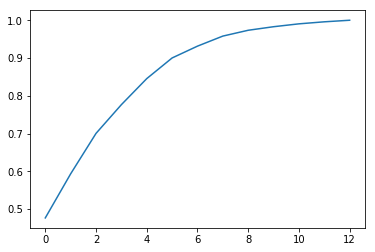

In [88]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA()
pca.fit(grouped_copy[columns_to_use])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [106]:
pca =PCA(n_components=6)
pca_6 = pca.fit_transform(grouped_copy[columns_to_use])

In [107]:
from sklearn.cluster import KMeans

In [108]:
n_clust = KMeans(n_clusters=5, random_state = 0)

In [109]:
n_clust.fit(grouped_copy[columns_to_use])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [110]:
cluster_result = n_clust.labels_

In [111]:
pd.DataFrame(cluster_result).iloc[:,0].value_counts()

0    966
4    151
3     31
2      4
1      1
Name: 0, dtype: int64

In [112]:
grouped_copy['label_us'] = n_clust.labels_

In [113]:
orignal_label_count = df.groupby(['author','account_category'],as_index=False).count()

In [114]:
orignal_label_count.account_category.value_counts()

RightTroll      630
LeftTroll       233
Fearmonger      124
HashtagGamer    112
NewsFeed         54
Name: account_category, dtype: int64

In [115]:
grouped_copy[grouped_copy['label_us'] == 0].cls.value_counts()

RightTroll      553
LeftTroll       170
Fearmonger      124
HashtagGamer     94
NewsFeed         25
Name: cls, dtype: int64

In [116]:
label_dic = {'RightTroll':0,'LeftTroll':4,'Fearmonger':2,'HashtagGamer':1,'NewsFeed':3}

In [117]:
sum(grouped_copy['cls'].map(label_dic) == cluster_result)/len(cluster_result)

0.5524718126626192

In [ ]:
grouped_copy['cls_num'].apply(label_dic)

## clustering end

In [196]:
def get_hash_tags(pattern, contents):
    word_list = []
    for sentence in contents:
        if isinstance(sentence, str):
            word_list += re.findall(pattern, sentence)
    return word_list

In [50]:
hash_tags = get_hash_tags(pattern, contents)

In [51]:
def count_hashtags(hash_tags):
    tag_to_num = collections.defaultdict(int)
    for hashtag in hash_tags:
        tag_to_num[hashtag] += 1 
    return tag_to_num

In [52]:
tag_to_num = count_hashtags(hash_tags)

In [ ]:
# Maybe we don't have to deal with this column yet.

### Wordcloud

#### content cloud, remove url/hashtag/@ 

In [12]:
content = list(df['content'])

In [162]:
content[1085298] = ''

NameError: name 'content' is not defined

In [73]:
content_str = ' '.join(content)

In [38]:
import re
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [39]:
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_hashtags(content):
    for i in range(len(content)):
        text = re.sub(r'#\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [40]:
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_hashtags(content):
    for i in range(len(content)):
        text = re.sub(r'#\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_at(content):
    for i in range(len(content)):
        text = re.sub(r'@\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content

In [21]:
print(content[:3])
remove_at(content[:3]) # test function

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC', 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ', 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.  #BoycottNFL https://t.co/qDlFBGMeag']


['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~  https://t.co/gh6g0D1oiC',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.  #BoycottNFL https://t.co/qDlFBGMeag']

In [18]:
remove_url(content[:3]) # test function

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun ',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.  #BoycottNFL ']

In [19]:
remove_hashtags(content[:3]) # test function

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.   https://t.co/qDlFBGMeag']

In [22]:
content = remove_url(content)

In [23]:
content = remove_hashtags(content)

In [24]:
content = remove_at(content)
content[:3]

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~  ',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.   ']

In [ ]:
# update on 7/10 by Xinyu 

In [155]:
#Analysis below is time information part 

In [23]:
# seperating different groups of handles 
df.account_type.unique()

array(['Koch', 'Right', 'Left', 'Russian', '?', 'Hashtager', 'Arabic',
       'Commercial', 'local', 'German', 'ZAPOROSHIA', 'news', 'Ebola ',
       'French'], dtype=object)

# extracting hashtags of tweets 
def get_hash_tag(content):
    if isinstance(content, str):
        word_list = re.findall('#(\w+)' , content)
        return word_list
    return []

df['hashtags'] = df.content.apply(get_hash_tag)

# extracting number of hashtags 
def count_num(hash_list):
    return len(hash_list)

df['hashtag_num'] = df.hashtags.apply(count_num)

time_df = df.groupby('pb_mdy_info').agg({'hashtags': 'sum', 'hashtag_num': 'count'})

time_df.head()


import heapq
from collections import defaultdict

def find_top5_ht(tag_list):
    tag_to_num = defaultdict(int)
    for tag in tag_list:
        tag_to_num[tag] += 1
    heap = []
    for tag in tag_to_num:
        heapq.heappush(heap, (tag_to_num[tag], tag))
    while len(heap) > 5:
        heapq.heappop(heap)
    return heap

time_df['top5_tags'] = time_df.hashtags.apply(find_top5_ht)

def get_tags(tag_list):
    tags = []
    for num, tag in tag_list:
        tags.append(tag)
    tags = list(reversed(tags))
    return tags

time_df['top_5_tag'] = time_df.top5_tags.apply(get_tags)

time_df_2.reset_index(inplace =True)

#### ''chenyu start''

top5_tags_time_series=[]
for i in range(len(time_df_2)):
    for t_c in time_df_2.iloc[i,1]:
        t_c = list(t_c)
        t_c.append(time_df_2.iloc[i,0])
        top5_tags_time_series.append(t_c)

top_tags_df = pd.DataFrame(top5_tags_time_series, columns = ['counts','tags','date'])

top_tags_df.to_csv('top_tags.csv')

top_tags_df =top_tags_df.astype({'date':'datetime64[ns]'})

top_tags_df.sort_values(by = ['date'])

In [88]:
import nltk
from nltk.corpus import stopwords

In [89]:
stop_words = stopwords.words('english')

In [90]:
def remove_url(content):
    for i in range(len(content)):
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_hashtags(content):
    for i in range(len(content)):
        text = re.sub(r'#\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_at(content):
    for i in range(len(content)):
        text = re.sub(r'@\w+', '', content[i], flags=re.MULTILINE)
        content[i] = text
    return content
def remove_stop_words(content):
    for i in range(len(content)):
        pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
        content[i] = pattern.sub('', content[i].lower())
    return content
        

In [91]:
%%time
#content derived from Ada's result
remove_stop_words(content)

Wall time: 38.6 s


['sitting democrat us senator trial corruption barely heard peep mainstream media   ',
 'marshawn lynch arrives game antitrump shirt judging sagging pants shirt say lynch vs belt ',
 'daughter fallen navy sailor delivers powerful monologue anthem protests burns nfl packers gear   ',
 ' president trump dedicates presidents cup golf tournament trophy people florida texas puerto rico ',
 '19000 respecting national anthem  ',
 'dan bongino nobody trolls liberals better donald trump exactly  ',
 ' ',
 '  matter cnn report crimes change fact going ',
 'much hate promoting cnn article admitting everything trump said pr relief two days ago ',
 'genocide remark san juan mayor narrative changed though  fixes reporting constantly',
 'genocide remark san juan mayor narrative changed though  fixes reporting constantly',
 ' apologize us lying',
 'sarah sanders destroys nbc reporter trump made joke maybe guys get sense humor ',
 'hi  remember said weinstein wonderful human  good friend powerhouse  di

In [65]:
def remove_punctuations(content):
    for i in range(len(content)):
        pattern = re.compile(r'[^\w\s]')
        content[i] = pattern.sub('',content[i])
    return content

In [93]:
%%time
remove_punctuations(content)

Wall time: 3.67 s


['sitting democrat us senator trial corruption barely heard peep mainstream media   ',
 'marshawn lynch arrives game antitrump shirt judging sagging pants shirt say lynch vs belt ',
 'daughter fallen navy sailor delivers powerful monologue anthem protests burns nfl packers gear   ',
 ' president trump dedicates presidents cup golf tournament trophy people florida texas puerto rico ',
 '19000 respecting national anthem  ',
 'dan bongino nobody trolls liberals better donald trump exactly  ',
 ' ',
 '  matter cnn report crimes change fact going ',
 'much hate promoting cnn article admitting everything trump said pr relief two days ago ',
 'genocide remark san juan mayor narrative changed though  fixes reporting constantly',
 'genocide remark san juan mayor narrative changed though  fixes reporting constantly',
 ' apologize us lying',
 'sarah sanders destroys nbc reporter trump made joke maybe guys get sense humor ',
 'hi  remember said weinstein wonderful human  good friend powerhouse  di

In [94]:
df_contents = df[['pb_mdy_info']]
df_contents['content'] = content

C:\Users\cheny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
df_contents.content = df_contents.content.map(str.rstrip)#trim
df_contents.content = df_contents.content.map(str.split)#split

C:\Users\cheny\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [41]:
df_contents.head()

,pb_mdy_info,content
0,10/1/2017,"[sitting, democrat, us, senator, trial, corrup..."
1,10/1/2017,"[marshawn, lynch, arrives, game, antitrump, sh..."
2,10/1/2017,"[daughter, fallen, navy, sailor, delivers, pow..."
3,10/1/2017,"[president, trump, dedicates, presidents, cup,..."
4,10/1/2017,"[19000, respecting, national, anthem]"


In [54]:
df_contents.shape

(2116867, 2)

In [56]:
word_time_series=[]

for i in range(len(df_contents)):
    for word in df_contents.iloc[i,1]:
        word_date = []
        word_date.extend([word,df_contents.iloc[i,0]])
        word_time_series.append(word_date)

KeyboardInterrupt: 

In [44]:
word_time_df = pd.DataFrame(word_time_series,columns = ['word','date'])

In [50]:
len(word_time_df)

14544087

In [ ]:
#word_time_df = word_time_df.astype({'date':'datetime64[ns]'})

In [47]:
word_time_df.to_csv('word_time.csv',index=False)

In [48]:
filter_date = word_time_df['date'] == '11/26/2015'

In [83]:
word_time_df.head()

,word,date
0,joke,11/26/2015
1,thanks,11/26/2015
2,god,11/26/2015
3,ate,11/26/2015
4,days,11/26/2015


In [ ]:
#contents related to trump 
#contents related to hillary
#contents related to democratic
#contents related to republicans

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
daily_words_df = df[['content','pb_mdy_info']]

In [78]:
vector = TfidfVectorizer()

In [79]:
tfidf = vector.fit_transform(a)

In [72]:
a = daily_words_df.iloc[:10,0].tolist()

In [81]:
feature_names = vector.get_feature_names()

In [84]:
dense = tfidf.todense()

In [86]:
df222 = pd.DataFrame(dense, columns = feature_names)

In [87]:
df222

,000,19,about,admitting,after,ago,aigv93ac8j,and,anthem,anti,...,two,tzmsea48oh,us,ve,vs,we,won,you,your,z9wva4djae
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.187901,0.000000,0.0000,...,0.000000,0.000000,0.221037,0.221037,0.0000,0.221037,0.000000,0.187901,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.2015,...,0.000000,0.000000,0.000000,0.000000,0.2015,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.203837,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.199955,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.235215
4,0.351001,0.351001,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.298383,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.30385,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.207696,0.176561,0.207696,0.000000
8,0.000000,0.000000,0.211362,0.211362,0.000000,0.211362,0.00000,0.000000,0.000000,0.0000,...,0.211362,0.211362,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.244805,0.000000,0.00000,0.000000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000


### ''chenyu end''

In [245]:
#Analysis below is user information part

In [246]:
df['post'] = 1
grouped = df.groupby('author')

In [248]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,...,alt_external_id,tco1_step1,pb_mdy_info,pb_hm_info,pb_month,pb_date,pb_hour,hashtags,hashtag_num,post
424,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,United States,English,11/26/2015 22:20,48,40,394,RETWEET,Koch,...,2535564756,https://twitter.com/Ina_Malone/status/67000248...,11/26/2015,22:20,11,26,22,"[FoodPoisoning, Walmart, KochFarms]",3,1
425,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,United States,English,11/26/2015 22:35,48,40,395,RETWEET,Koch,...,2535564756,https://twitter.com/Willie_BigN/status/6700043...,11/26/2015,22:35,11,26,22,"[turkey, KochFarms]",2,1
426,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",United States,English,5/25/2015 12:38,59,51,354,NaN,Koch,...,2535564756,NaN,5/25/2015,12:38,5,25,12,[],0,1
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",United States,English,5/25/2015 12:38,59,51,352,NaN,Koch,...,2535564756,NaN,5/25/2015,12:38,5,25,12,[],0,1
429,1D_NICOLE_,jade doesn`t love her! https://t.co/fEOsiKho7C,United States,English,5/25/2015 12:39,59,51,357,NaN,Koch,...,2535564756,https://vine.co/v/OIPJQ21bwg9,5/25/2015,12:39,5,25,12,[],0,1


In [249]:
user_info = grouped.agg({'post': 'sum', 'following': 'mean', 'pb_hour': 'mean',  'followers': 'mean', 'hashtag_num': 'mean'})
user_info

,post,following,pb_hour,followers,hashtag_num
author,,,,,
1D_NICOLE_,41,58.463415,12.756098,51.414634,0.268293
1ERIK_LEE,2,239.000000,9.000000,74.000000,2.000000
2NDHALFONION,3,22.000000,22.000000,1.000000,0.000000
4EVER_SUSAN,62,75.661290,13.790323,57.822581,1.580645
4MYSQUAD,4767,2276.242291,13.077617,1158.421649,1.641703
5EMEN5EMENICH,1,552.000000,16.000000,718.000000,2.000000
AAASSSSSHHH,71,27.633803,8.985915,40.225352,2.126761
AANTIRACIST,1239,904.519774,13.627119,747.964487,0.670702
AARONALLENALL,17,52.058824,2.588235,51.117647,2.352941


In [ ]:
# Below are information related to '@'

In [250]:
pattern = '@(\w+)'
def get_at_tags(pattern, contents):
    word_list = []
    for sentence in contents:
        if isinstance(sentence, str):
            word_list += re.findall(pattern, sentence)
    return word_list

In [253]:
def count_attags(at_tags):
    tag_to_num = collections.defaultdict(int)
    for hashtag in hash_tags:
        tag_to_num[hashtag] += 1 
    return tag_to_num

In [252]:
at_list = get_at_tags(pattern, contents)

In [254]:
at_to_num = count_attags(at_list)

In [256]:
at_to_num

defaultdict(int,
            {'FoodPoisoning': 772,
             'Walmart': 960,
             'KochFarms': 3748,
             'turkey': 885,
             'JasonAldean': 40,
             'hungry': 10,
             'DumbGenieWishes': 280,
             'YoLandi': 1,
             'petition': 93,
             'NoGunsForCriminals': 432,
             'black': 237,
             'Raiders': 21,
             'Carr': 2,
             'RaiderNation': 32,
             'MikeAndMolly': 3,
             'CaitlynJenner': 75,
             'ConversationWithAlanis': 13,
             'HOLYPOOPICANPUTT': 2,
             'WillSmith': 11,
             'DearSugarRadio': 2,
             'GOPDebate': 3864,
             'VegasGOPDebate': 2320,
             'Cruz': 165,
             'Bush': 66,
             'CNNDebate': 220,
             'Power100': 2,
             'WCW': 334,
             'wordsofwisdom': 5,
             'quoteoftheday': 37,
             'IslamKills': 3955,
             'tousensemble': 8,
          